In [12]:
#first, we will just do a nromal run of this integration method on a fixed S and array

def insertion_sort(unsorted, count):
    for i in range(1, len(unsorted)):
        for j in range(i, 0, -1):
            count += 1
            if unsorted[j] < unsorted[j-1]:
                temp1 = unsorted[j]
                unsorted[j] = unsorted[j-1]
                unsorted[j-1] = temp1
            else:
                break

    sorted = unsorted

    return sorted, count


def merge(left, right, count):
    sorted =[]
    i = 0
    while(left and right):
        count += 1
        if left[0] < right[0]:
            sorted.append(left[0])
            left.pop(0)
            i += 1
        elif left[0] > right[0]:
            sorted.append(right[0])
            right.pop(0)
            i += 1
        else:
            sorted.append(left[0])
            left.pop(0)
            i += 1
            sorted.append(right[0])
            right.pop(0)
            i += 1
    while left:
        sorted.append(left[0])
        left.pop(0)
    while right:
        sorted.append(right[0])
        right.pop(0)

    return sorted, count


def merge_sort(unsorted, S, count):
    sorted = []

    if(len(unsorted) <= S):
        sorted, count = insertion_sort(unsorted, count)
    else:
        unsorted1 = unsorted[:len(unsorted)//2]
        unsorted2 = unsorted[len(unsorted)//2:]

        left, count = merge_sort(unsorted1, S, count)
        right, count = merge_sort(unsorted2, S, count)

        sorted, count = merge(left, right, count)

    return sorted, count


def main():
    unsorted = [64,7,45,29,16,12,6,8,14,1,7,27,7,26,44,39,81,77,94,1,7,11]
    S = 3
    count = 0

    sorted, count = merge_sort(unsorted, S, count)

    print(sorted)
    print(count)


main()





[1, 1, 6, 7, 7, 7, 7, 8, 11, 12, 14, 16, 26, 27, 29, 39, 44, 45, 64, 77, 81, 94]
62


In [13]:
#Next we will generate the input data for both cases
import random
# Next, we will have N number of data points for each variation of n ranging from size 1000 to 10 million.
number_of_data_points_n = 10 #set number of data_points for n here, below we will create the variations size based on this which will be equally spaced out between 1000 and 10000000. we space out equally to ensure an even graph
# We define the start and end points of the range, and calculate the step size
start_point = 1000
end_point = 1000000
step_size = (end_point - start_point) / (number_of_data_points_n - 1)
# Create an array of equally spaced values between the start and end points
n_variations = [int(start_point + i*step_size) for i in range(number_of_data_points_n)]

#generate an array for S similarly depedning on the required number of values 
number_of_data_points_S = 20
s_variations = [int(1 + i) for i in range(number_of_data_points_S)]

# We define maximum value of x to be 1 000 000
x = 10000000

# Lastly, we will generate arrays of these sizes using random
testdata = []
for n in n_variations:
    data = [random.randint(1, x) for i in range(n)]
    testdata.append(data)


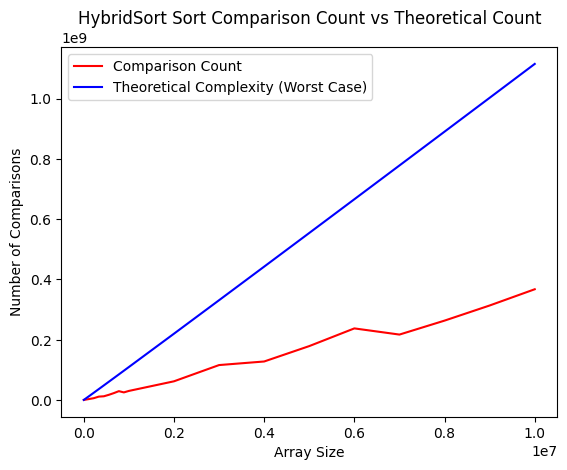

In [14]:
import math
import matplotlib.pyplot as plt

#fix S to be 10
S = 100

keys = n_variations 
values_comparisons = []

vals_from_C_var = [2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000]

vals_from_C_kc = [61798998,115701924,127568728,178673285,237383238,216901119,263215082,313388939,367315486]

for num in vals_from_C_var:
    n_variations.append(num)

values_equation = []

for n in n_variations:
    values_equation.append(S*n + n*(math.log(n/S)))
    
for test in testdata:
    values_comparisons.append(merge_sort(test, S, 0)[1])

for val in vals_from_C_kc:
   values_comparisons.append(val)

plt.plot(n_variations, values_comparisons, c='r', label='Comparison Count')
plt.plot(n_variations, values_equation, 'b', label='Theoretical Complexity (Worst Case)')


# Add labels and legend
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.title('HybridSort Sort Comparison Count vs Theoretical Count')
plt.legend(loc='upper left')

# Display the plot
plt.show()

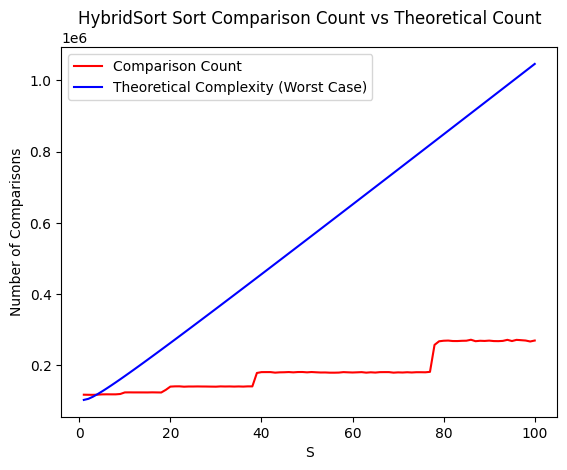

In [7]:
import random
import math
import matplotlib.pyplot as plt


#Now, we will fix the array size at 100 000

number_of_data_points_S = 100
s_variations = [int(1 + i) for i in range(number_of_data_points_S)]
kc_vals = []
values_equation = []
x = 10000

for s in s_variations:
    n_variations = [10000]

    #load random data
    testdata = []
    for n in n_variations:
        data = [random.randint(1, x) for i in range(n)]
        testdata.append(data)

    kc_vals.append(merge_sort(testdata[0], s, 0)[1])

    values_equation.append(s*10000 + 10000*(math.log(10000/s)))


plt.plot(s_variations, kc_vals, c='r', label='Comparison Count')
plt.plot(s_variations, values_equation, 'b', label='Theoretical Complexity (Worst Case)')

# Add labels and legend
plt.xlabel('S')
plt.ylabel('Number of Comparisons')
plt.title('HybridSort Sort Comparison Count vs Theoretical Count')
plt.legend(loc='upper left')

# Display the plot
plt.show()




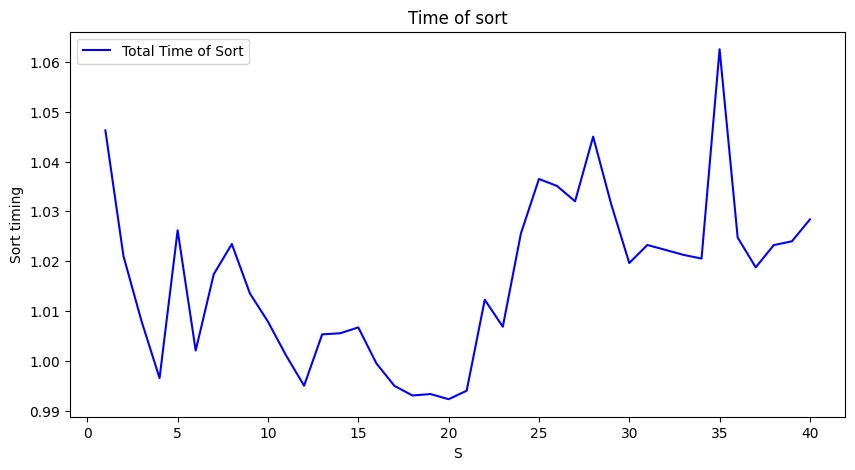

In [16]:
import random
import math
import matplotlib.pyplot as plt
import time
from time import process_time

n_variations = [1000, 10000, 100000, 1000000, 10000000]
s_variations = [int(i+1) for i in range(40)]
store_timing = []
data = []

for s in s_variations:
    start_time = process_time()
    for num in range(10):
        data.append([random.randint(1, n_variations[4]) for i in range(n_variations[4])])
        merge_sort(data[0],s,0)

    end_time = process_time()
    store_timing.append((end_time-start_time)/10)

f = plt.figure(figsize=(10, 5))
plt.plot(s_variations, store_timing, c='b', label='Total Time of Sort')

plt.xlabel('S')
plt.ylabel('Sort timing')
plt.title('Time of sort')
plt.legend(loc='upper left')

plt.show()